In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Coger datos de MNIST

import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Using TensorFlow backend.


In [0]:
# MODELO
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['binary_accuracy'])

In [0]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [15]:
# ENTRENAMIENTO CONTROLANDO COSTE

history = LossHistory()

hist = model.fit(x_train, y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_test,y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0858 - binary_accuracy: 0.9140 - val_loss: 0.0848 - val_binary_accuracy: 0.9149
Epoch 2/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0840 - binary_accuracy: 0.9157 - val_loss: 0.0796 - val_binary_accuracy: 0.9201
Epoch 3/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0765 - binary_accuracy: 0.9232 - val_loss: 0.0735 - val_binary_accuracy: 0.9263
Epoch 4/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0739 - binary_accuracy: 0.9258 - val_loss: 0.0715 - val_binary_accuracy: 0.9283
Epoch 5/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0722 - binary_accuracy: 0.9276 - val_loss: 0.0713 - val_binary_accuracy: 0.9286
Epoch 6/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0713 - binary_accuracy: 0.9284 - val_loss: 0.0697 - val_binary_a

In [17]:

# EVALUACION
score = model.evaluate(x_test, y_test, batch_size=128)

y_hat_test = model.predict(x_test, batch_size=128)

score

10000/10000 [==============================] - 0s 15us/step


[0.0683933491230011, 0.9314199844360351]

In [18]:
y_hat_test.shape

(10000, 10)

In [12]:
hist.history

{'binary_accuracy': [0.8707833349863688,
  0.889849994691213,
  0.8922849926312765,
  0.894546658929189,
  0.8946866590817769,
  0.8949483258565267,
  0.896493327999115,
  0.9070549851735433,
  0.9090716540336609,
  0.9104083212534586,
  0.9117666517575582,
  0.9120016547203064,
  0.9126016527811687,
  0.9120166525204977,
  0.9120099886576335,
  0.9142333182970683,
  0.913308318456014,
  0.9135499871571858,
  0.9140766521135966,
  0.9138366509755452],
 'loss': [0.1284038835088412,
  0.10970725684165955,
  0.1073978254199028,
  0.10523345377445222,
  0.10508809795379638,
  0.10482987275123597,
  0.10327206563949586,
  0.09262288730144501,
  0.0906132075270017,
  0.08934821455081304,
  0.08799976028203964,
  0.08773096123933792,
  0.08716947973966599,
  0.08772191703716914,
  0.08770161358912786,
  0.08550899111827215,
  0.08646318662166595,
  0.08624422812461853,
  0.08571553837060929,
  0.0859865582148234],
 'val_binary_accuracy': [0.8927999900817871,
  0.8936399874687195,
  0.89045999

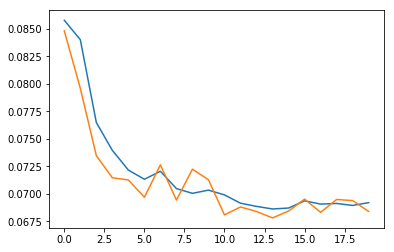

In [16]:
import matplotlib.pyplot as plt

plt.figure
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [8]:
# En realidad ya lo devuelve la función
hist = model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)

Epoch 1/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0314 - binary_accuracy: 0.9684
Epoch 2/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0313 - binary_accuracy: 0.9686
Epoch 3/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0304 - binary_accuracy: 0.9695
Epoch 4/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0307 - binary_accuracy: 0.9691
Epoch 5/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0305 - binary_accuracy: 0.9693
Epoch 6/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0305 - binary_accuracy: 0.9693
Epoch 7/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0294 - binary_accuracy: 0.9705
Epoch 8/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0296 - binary_accuracy: 0.9703
Epoch 9/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0294 - binary_accuracy:

In [0]:
hist.on_batch_begin

<bound method Callback.on_batch_begin of <keras.callbacks.History object at 0x7f5ba214e7b8>>

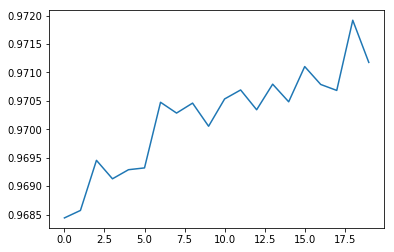

In [10]:
plt.figure
plt.plot(hist.history['binary_accuracy'])

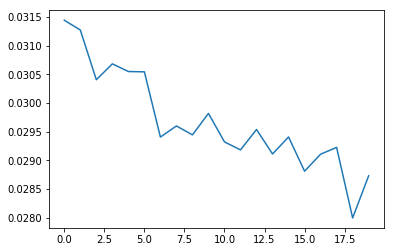

In [11]:
plt.figure
plt.plot(hist.history['loss'])

In [0]:
# MODELO
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['binary_accuracy','mean_squared_error'])

# En realidad ya lo devuelve la función
hist2 = model.fit(x_train, y_train,
          epochs=20,
          batch_size=128,
          verbose=False)

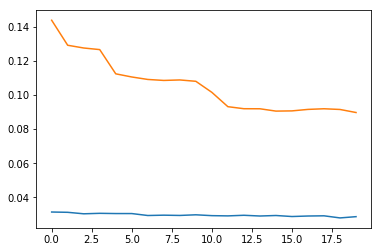

In [14]:
plt.figure
plt.plot(hist.history['loss'])
plt.plot(hist2.history['mean_squared_error'])